## Introduction<br>
### Analayzed Data<br>
In this data analysis project, I have chosen csv's from the data set Gapminder World. The csv's are:<br>
<ul style="list-style-type:circle">
    <li><b>car_deaths_per_100000_people.csv</b> (description: Mortality among drivers and passengers of 4-wheel motorized vehicles, per 100,000. Source link: http://www.who.int)</li>
    <li><b>gdppercapita_us_inflation_adjusted.csv</b> (description: GDP per capita is gross domestic product divided by midyear population. Source link: http://data.worldbank.org/indicator/NY.GDP.PCAP.KD)</li>
</ul>

### Questions<br>
1) Which countries have the smallest/ biggest number of car deaths per year in the time frame 1999 to 2008?<br>
2) How is the average number of car deaths per 100,000 people developing between 1999 and 2008?<br>
3) Is there a correlation between number of car deaths and the GDP in the year 2007?


## Question 1) Which countries have the smallest/ biggest number of car deaths per year in the time frame 1999 to 2008? 
I figured out that this data has a lot of missing values, especially during the years before 1999. That is why I only want to analyze respective data between 1999 and 2008. Meanwhile, I analyze all countries in the first step and afterwards just have a look at those countries with at least 60% complete data. If countries have too much missing data, the results might not be significant enough.


At first I take the data from the file <b>car_deaths_per_100000_people.csv</b>

In [1]:
import pandas as pd
import numpy as np
# Take in a csv.
cardeaths_df = pd.read_csv('car_deaths_per_100000_people.csv')

In [2]:
cardeaths_df.head()

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.98,0.00,NaN
1,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.90,9.88,8.65,7.38,7.96,8.22,8.38,8.97,8.68,NaN
2,Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.90,NaN
3,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.79,7.10,6.27,6.33,5.97,5.42,0.00,4.80,5.33,NaN
4,Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.77,5.76,6.08,4.68,5.04,4.66,4.44,4.18,4.04,3.54


Many elements have the value 0 and in the column 2008, a lot of data is missing (NaN). I replaced all elements with the value '0' to the value NaN, so all elements with missing data or the value '0' have the same appearance.<br>
For this action, I used the code <b>df = cardeaths_df.replace({0:np.nan})</b>

In [3]:
# Replace a elements, what have the value '0', with the value NaN.
df = cardeaths_df.replace({0:np.nan})
df.head()

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,NaN
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.90,9.88,8.65,7.38,7.96,8.22,8.38,8.97,8.68,NaN
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.90,NaN
3,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.79,7.10,6.27,6.33,5.97,5.42,NaN,4.80,5.33,NaN
4,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.77,5.76,6.08,4.68,5.04,4.66,4.44,4.18,4.04,3.54


The code <b>df.set_index('country').iloc[:, 14:]</b> sets column 'country' as the index, selects all rows and the columns for the years 1999 to 2008. The following data analysis should concentrate on this time frame, as the years before miss a lot of data.

In [4]:
# Set the column 'country' as the index and select all rows
# and columns for the years 1999 to 2008.
df1 = df.set_index('country').iloc[:, 14:]
df1.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,NaN
Argentina,10.90,9.88,8.65,7.38,7.96,8.22,8.38,8.97,8.68,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.90,NaN
Australia,6.79,7.10,6.27,6.33,5.97,5.42,NaN,4.80,5.33,NaN
Austria,7.77,5.76,6.08,4.68,5.04,4.66,4.44,4.18,4.04,3.54


If I want to know, which country's data is at least 60% complete, therefor I count the number of NaN values in each row. This code <b>df1.isna().sum(axis=1)</b> gives a series in which the elements with no value (NaN) are counted for each row.

In [5]:
# This code counts the number of NaN elements for each
# row and produces a respective series.
s1 = df1.isna().sum(axis=1)
s1.head()

country
Albania      9
Argentina    1
Armenia      9
Australia    2
Austria      0
dtype: int64

As a next step, I merge the data frame <b>df1</b> with the series <b>s1</b> horizontally with the code <b>pd.concat([df1, s1], axis=1)</b> 

In [6]:
# Here I merge the data frame df1 and the series
# s1 horizontally.
df2 = pd.concat([df1, s1], axis=1)
df2.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,0
country,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,NaN,9
Argentina,10.90,9.88,8.65,7.38,7.96,8.22,8.38,8.97,8.68,NaN,1
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.90,NaN,9
Australia,6.79,7.10,6.27,6.33,5.97,5.42,NaN,4.80,5.33,NaN,2
Austria,7.77,5.76,6.08,4.68,5.04,4.66,4.44,4.18,4.04,3.54,0


Finally I change the name fo the last column to 'number-NaN' with the code <b>df2.rename(columns={0: 'number-NaN'})</b>

In [7]:
# This code renames the last column.
df2 = df2.rename(columns={0: 'number-NaN'})
df2.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,number-NaN
country,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,NaN,9
Argentina,10.90,9.88,8.65,7.38,7.96,8.22,8.38,8.97,8.68,NaN,1
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.90,NaN,9
Australia,6.79,7.10,6.27,6.33,5.97,5.42,NaN,4.80,5.33,NaN,2
Austria,7.77,5.76,6.08,4.68,5.04,4.66,4.44,4.18,4.04,3.54,0


After this data wrangling phase, I start to answer the first question and get the countries, what have the highest number of car deaths in each year during the time frame 1999 to 2008.<br> Therefor I use the code
<b>df2.loc[df2.iloc[:, 1].idxmax()]</b><br>
In 1999, it is El Salvador, for 2000, it is the Dominican Republic, for 2001, it is El Salvador and so on.

In [8]:
# The following line gets the maximum values
# of the data frame df2 for each year between 1999 and 2008.
df2.loc[df2.iloc[:, 0:10].idxmax()]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,number-NaN
country,,,,,,,,,,,
El Salvador,33.7,NaN,32.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Dominican Republic,20.3,17.1,17.2,NaN,17.3,15.5,NaN,NaN,17.1,NaN,4
El Salvador,33.7,NaN,32.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Latvia,13.6,13.0,12.4,12.8,11.7,11.1,10.2,8.13,10.0,8.28,0
Dominican Republic,20.3,17.1,17.2,NaN,17.3,15.5,NaN,NaN,17.1,NaN,4
Iran,NaN,NaN,NaN,NaN,NaN,26.7,NaN,NaN,NaN,NaN,9
Maldives,NaN,NaN,NaN,NaN,NaN,NaN,29.3,NaN,NaN,NaN,9
Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.90,NaN,NaN,9
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.9,NaN,9


Next,I want to concentrate on those countries with a higher significance of their data. Therefor I choose those countries with at least 60% existing data elements. These are countries with a sum of NaN elements equal or less than 4. In order to achieve this selection, I use the code <b>df2[df2.iloc[:,10] <= 4]</b>

In [9]:
# The following code only displays those rows,
# where the number of NaN values is less or equal 4.
df3 = df2[df2.iloc[:,10] <= 4]
df3.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,number-NaN
country,,,,,,,,,,,
Argentina,10.90,9.88,8.65,7.38,7.96,8.22,8.38,8.97,8.68,NaN,1
Australia,6.79,7.10,6.27,6.33,5.97,5.42,NaN,4.80,5.33,NaN,2
Austria,7.77,5.76,6.08,4.68,5.04,4.66,4.44,4.18,4.04,3.54,0
Bahamas,14.50,14.80,10.50,8.14,8.18,11.50,14.20,NaN,9.41,NaN,2
Brazil,6.65,7.07,6.64,6.98,6.71,7.25,6.84,1.87,NaN,NaN,2


How many countries are existing in df2? I can use the code <b>df2.shape[0]</b> to get this answer.

In [10]:
df2.shape[0]

139

This is the number of countries in df3, what possess at least 60% complete data:

In [11]:
df3.shape[0]

52

That means if we put high importance on data completeness, we have to accept that we exclude a lot of countries. Examining df3, we also get another list of countries, what have the highest number of car deaths in each year during the time frame 1999 to 2008. Interestingly, the Dominican Republic holds the top positions in many years: 

In [12]:
# The following line gets the maximum values
# of the data frame df3 for each year between 1999 and 2008.
df3.loc[df3.iloc[:, 0:10].idxmax()]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,number-NaN
country,,,,,,,,,,,
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4
Latvia,13.6,13.00,12.4,12.80,11.70,11.10,10.20,8.13,10.00,8.28,0
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4
Bahamas,14.5,14.80,10.5,8.14,8.18,11.50,14.20,NaN,9.41,NaN,2
Lithuania,11.5,9.42,10.7,11.20,11.70,11.00,12.70,13.70,13.20,8.09,0
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4


Now I have a look at all 139 countries and find those ones, what have the smallest number of car deaths in each year during the time frame 1999 to 2008. Here we use the code <b>df2.loc[df2.iloc[:, 0:10].idxmin()].</b> For 1999, it is Chile, for 2000 and 2001, it is Mauritius and so on.

In [13]:
# The following line gets the minimum values
# of the data frame df2 for each year between 1999 and 2008.
df2.loc[df2.iloc[:, 0:10].idxmin()]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,number-NaN
country,,,,,,,,,,,
Chile,0.771,1.420,1.770,0.880,1.220,1.47,1.33,3.330,NaN,NaN,2
Mauritius,NaN,0.113,0.119,NaN,NaN,NaN,NaN,NaN,2.990,NaN,7
Mauritius,NaN,0.113,0.119,NaN,NaN,NaN,NaN,NaN,2.990,NaN,7
Malaysia,NaN,5.880,0.644,0.383,1.720,9.86,10.60,9.540,6.130,NaN,2
Singapore,0.808,0.918,0.923,0.805,0.914,NaN,NaN,NaN,0.715,NaN,4
St. Vincent and the Grenadines,NaN,2.190,0.946,1.630,NaN,1.44,NaN,NaN,3.120,NaN,5
Costa Rica,5.970,5.370,1.980,4.750,4.690,3.48,1.15,0.589,6.320,NaN,1
Costa Rica,5.970,5.370,1.980,4.750,4.690,3.48,1.15,0.589,6.320,NaN,1
Singapore,0.808,0.918,0.923,0.805,0.914,NaN,NaN,NaN,0.715,NaN,4


Now I want to know those countries, what have the smallest number of car deaths in each year during the time frame 1999 to 2008, but I only concentrate on those countries with at least 60% complete data. Here I take the code <b>df3.loc[df3.iloc[:, 0:10].idxmin()]</b> In this case, Mauritius is not included in the ranking any more, because it has only 30% complete data.

In [14]:
# The following line gets the minimum values
# of the data frame df3 for each year between 1999 and 2008.
df3.loc[df3.iloc[:, 0:10].idxmin()]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,number-NaN
country,,,,,,,,,,,
Chile,0.771,1.420,1.770,0.880,1.220,1.47,1.33,3.330,NaN,NaN,2
Singapore,0.808,0.918,0.923,0.805,0.914,NaN,NaN,NaN,0.715,NaN,4
Malaysia,NaN,5.880,0.644,0.383,1.720,9.86,10.60,9.540,6.130,NaN,2
Malaysia,NaN,5.880,0.644,0.383,1.720,9.86,10.60,9.540,6.130,NaN,2
Singapore,0.808,0.918,0.923,0.805,0.914,NaN,NaN,NaN,0.715,NaN,4
Malta,1.390,2.510,2.300,1.430,0.956,1.45,2.69,1.460,1.520,2.23,0
Costa Rica,5.970,5.370,1.980,4.750,4.690,3.48,1.15,0.589,6.320,NaN,1
Costa Rica,5.970,5.370,1.980,4.750,4.690,3.48,1.15,0.589,6.320,NaN,1
Singapore,0.808,0.918,0.923,0.805,0.914,NaN,NaN,NaN,0.715,NaN,4


## Question 2) How is the average number of car deaths per 100,000 people developing between 1999 and 2008?<br>
I want to take the average of car deaths of each year and then show these results in a line plot. Here we use df3, what only shows those countries with 60% complete data. With the following loop, I get a list of the average values for each year.

In [15]:
# This loop produces a list with the average values
# for each year.
list_aver = []
def get_average():
    i = 1999
    global list_aver 
    
    while i < 2009:
        a = df3[str(i)].mean()
        list_aver.append(a)
        i = i + 1
    print list_aver
get_average()      

[7.208104166666664, 6.877411764705882, 6.388176470588236, 6.03896, 6.0977999999999986, 6.1240000000000006, 5.94191489361702, 5.459543478260869, 6.142125, 5.54388888888889]


Here I create a series from the list with the mean values. And I set index of the series to the column values from the dataframe df3.

In [16]:
# The list 'list_aver' is transformed to a NumPy array
# and afterwards changed to a pandas series, what has 
# the same index like data frame df3.
import pandas as pd
import numpy as np
data = np.array(list_aver)
s = pd.Series(data,index=[(df3.columns[0:10].values)])
print s

1999    7.208104
2000    6.877412
2001    6.388176
2002    6.038960
2003    6.097800
2004    6.124000
2005    5.941915
2006    5.459543
2007    6.142125
2008    5.543889
dtype: float64


Finally I create a line plot with the average number of car deaths per year from the data frame df3. 

Text(0,0.5,'Average Number of Car Deaths')

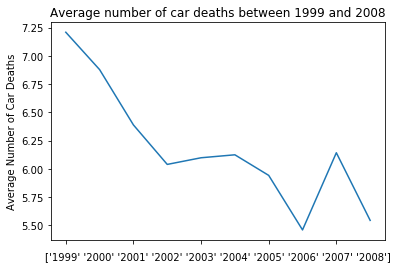

In [17]:
# This code produces a line plot with 
# the average number of car deaths per year.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
s.plot()
plt.title('Average number of car deaths between 1999 and 2008')
plt.xlabel('Time')
plt.xlabel(df3.columns[0:10].values)
plt.ylabel('Average Number of Car Deaths')

## Question 3) Is there a correlation between number of car deaths and the GDP in the year 2007?

At first I take the data from the file <b>gdppercapita_us_inflation_adjusted.csv</b>

In [18]:
# Here the code gets the data of a csv.
import pandas as pd
import numpy as np

gdp_df = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')

In [19]:
gdp_df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,445,525,553,569,630,634,630,620,618,618.0
1,Albania,0,0,0,0,0,0,0,0,0,...,3780,3930,4090,4210,4280,4330,4410,4520,4680,4870.0
2,Algeria,2470,2080,1630,2130,2200,2280,2110,2240,2410,...,4390,4390,4460,4500,4560,4600,4680,4760,4830,4830.0
3,Andorra,0,0,0,0,0,0,0,0,0,...,43900,42000,39700,38200,38200,39100,40800,41800,43000,43900.0
4,Angola,0,0,0,0,0,0,0,0,0,...,3580,3540,3530,3540,3590,3710,3750,3730,3580,3480.0


The code <b>df.set_index('country').iloc[:, 14:]</b> sets column 'country' as the index, selects all rows and the columns for the years 1999 to 2008

In [20]:
# The code sets to column 'country' as the index and 
# selects all rows and columns for 1999 to 2008.
gdp_df1 = gdp_df.set_index('country').iloc[:, 39:49] 
gdp_df1.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,
Afghanistan,0,0,0,365,377,364,389,398,440,445
Albania,2180,2340,2550,2660,2830,3000,3190,3380,3610,3780
Algeria,3460,3540,3600,3750,3970,4090,4270,4280,4360,4390
Andorra,40000,40800,41400,42400,45500,47000,48800,49700,48700,43900
Angola,1720,1720,1740,1910,1920,2050,2390,2740,3260,3580


In one of the next steps, I want to merge the car death data frame and the gdp data frame. In order not to mix up the columns of the two data frames, I firstly rename the columns of the gdp data frame:

In [21]:
# This code renames columns.
gdp_df2 = gdp_df1.rename(columns={'1999': 'gdp99', '2000': 'gdp00', '2001': 'gdp01', '2002': 'gdp02', '2003': 'gdp03', '2004': 'gdp04', '2005': 'gdp05', '2006': 'gdp06', '2007': 'gdp07', '2008': 'gdp08'})
gdp_df2.head()

,gdp99,gdp00,gdp01,gdp02,gdp03,gdp04,gdp05,gdp06,gdp07,gdp08
country,,,,,,,,,,
Afghanistan,0,0,0,365,377,364,389,398,440,445
Albania,2180,2340,2550,2660,2830,3000,3190,3380,3610,3780
Algeria,3460,3540,3600,3750,3970,4090,4270,4280,4360,4390
Andorra,40000,40800,41400,42400,45500,47000,48800,49700,48700,43900
Angola,1720,1720,1740,1910,1920,2050,2390,2740,3260,3580


I take df2 with all 139 countries and rename the columns of this data frame as well:

In [22]:
# This code renames columns.
df4 = df2.rename(columns={'1999': 'car99', '2000': 'car00', '2001': 'car01', '2002': 'car02', '2003': 'car03', '2004': 'car04', '2005': 'car05', '2006': 'car06', '2007': 'car07', '2008': 'car08'})
df4.head()

,car99,car00,car01,car02,car03,car04,car05,car06,car07,car08,number-NaN
country,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,NaN,9
Argentina,10.90,9.88,8.65,7.38,7.96,8.22,8.38,8.97,8.68,NaN,1
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.90,NaN,9
Australia,6.79,7.10,6.27,6.33,5.97,5.42,NaN,4.80,5.33,NaN,2
Austria,7.77,5.76,6.08,4.68,5.04,4.66,4.44,4.18,4.04,3.54,0


Now I merge the data frames df4 and gdp_df2 on the column 'country', and I only want to keep those rows, that exist in both tables, so I use this code: <b>df4.merge(gdp_df2, on='country', how='inner')</b>

In [23]:
# Here the data frames df4 and gdp_df2 are merged
# on the column 'country' and only those rows are kept,
# what exist in both data frames (how='inner').
df_car_gdp = df4.merge(gdp_df2, on='country', how='inner')
df_car_gdp.head()

,car99,car00,car01,car02,car03,car04,car05,car06,car07,car08,...,gdp99,gdp00,gdp01,gdp02,gdp03,gdp04,gdp05,gdp06,gdp07,gdp08
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,NaN,...,2180,2340,2550,2660,2830,3000,3190,3380,3610,3780
Argentina,10.90,9.88,8.65,7.38,7.96,8.22,8.38,8.97,8.68,NaN,...,8340,8180,7740,6820,7340,7910,8520,9110,9830,10100
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.90,NaN,...,1320,1400,1550,1760,2020,2240,2570,2930,3370,3630
Australia,6.79,7.10,6.27,6.33,5.97,5.42,NaN,4.80,5.33,NaN,...,43100,44300,44600,45800,46600,47900,48800,49400,51000,51800
Austria,7.77,5.76,6.08,4.68,5.04,4.66,4.44,4.18,4.04,3.54,...,40700,42000,42400,42900,43100,44000,44600,46000,47500,48100


For the calculation of correlation, I am only interested in the year 2007, so I choose the columns 'car07' and 'gdp07' 

In [24]:
# This code chooses the two columns 'car07' and 'cdp07'.
df_car_gdp1 = df_car_gdp[["car07", "gdp07"]]
df_car_gdp1.head()

,car07,gdp07
country,,
Albania,NaN,3610
Argentina,8.68,9830
Armenia,7.90,3370
Australia,5.33,51000
Austria,4.04,47500


I want to check how many countries exist in both data frames:

In [25]:
df_car_gdp1.shape[0]

139

I drop those rows, what contain NaN elements, because it is hardly possible to standardize NaN values:

In [26]:
# Here I drop those rows what contain NaN values.
df_car_gdp2 = df_car_gdp1.dropna()
df_car_gdp2.head()

,car07,gdp07
country,,
Argentina,8.68,9830
Armenia,7.90,3370
Australia,5.33,51000
Austria,4.04,47500
Azerbaijan,5.28,4850


How many rows do I have in df_car_gdp2 now?

In [27]:
df_car_gdp2.shape[0]

103

Now I calculate the correlation (Pearson's r) between the number of car deaths and the GDP of selected countries in 2007. For the calculation of Pearson's r, I should use uncorrected standard deviation, the argument in the function is ddof=0

In [28]:
# This code calculates the correlation between 
# the number of car deaths and the GDP of 
# selected countries in 2007.
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [29]:
correlation(df_car_gdp2['car07'], df_car_gdp2['gdp07'])

-0.30019975853305014

Pearson's r is about -0.3, that means there is a negative correlation between both variables. But which variable is above and which is below the mean? From the results below, I can see that more countries have a number of car deaths, what is bigger than the average. In contrast, more countries have a GDP, what is smaller than the average. 

In [30]:
# The code gets the average of the standardized values
# for the column 'car07' and 'gdp07'.
def correlation1(x):
    std_x = (x - x.mean()) / x.std(ddof=0)
    
    return std_x.mean()

In [31]:
correlation1(df_car_gdp2['car07'])

1.9887004664402077e-16

In [32]:
correlation1(df_car_gdp2['gdp07'])

-3.664813867694692e-17

The mean of the standardized values for gdp is negative and the mean of the standardized values for car deaths is positive. One interpretation could be: If gdp decreases, the number of car deaths increases and vice versa. But we have to be careful, because correlation does not necessarily imply causation.

In the end of the data analysis project, I want to create a scatter plot with the standardized values of the data frame <b>df_car_gdp2</b>. With the function <b>correlation3</b>, I get the standardized values of car07. 

In [33]:
# Here the code produces a series with the standardized
# values of the column 'car07'
def correlation3(x):
    std_x = (x - x.mean()) / x.std(ddof=0)
    
    return std_x

In [34]:
correlation3(df_car_gdp2['car07']).head()

country
Argentina    -0.148159
Armenia      -0.263270
Australia    -0.642547
Austria      -0.832924
Azerbaijan   -0.649926
Name: car07, dtype: float64

Here I add the standardized values of car07 to the dataframe

In [35]:
# The code below adds the series to the data frame.
df_car_gdp3 = pd.concat([df_car_gdp2, correlation3(df_car_gdp2['car07'])], axis=1)
df_car_gdp3.head()

,car07,gdp07,car07
country,,,
Argentina,8.68,9830,-0.148159
Armenia,7.90,3370,-0.263270
Australia,5.33,51000,-0.642547
Austria,4.04,47500,-0.832924
Azerbaijan,5.28,4850,-0.649926


I use the function <b>correlation3</b> again, in order to get the standardized values of gdp07, then I add the standardized values of gdp07 to the dataframe

In [36]:
#The function gets the standardized values of 'gdp07'.
correlation3(df_car_gdp2['gdp07']).head()

country
Argentina    -0.259555
Armenia      -0.614464
Australia     2.002306
Austria       1.810018
Azerbaijan   -0.533154
Name: gdp07, dtype: float64

In [37]:
# The code below adds the series to the data frame.
df_car_gdp4 = pd.concat([df_car_gdp3, correlation3(df_car_gdp2['gdp07'])], axis=1)
df_car_gdp4.head()

,car07,gdp07,car07,gdp07
country,,,,
Argentina,8.68,9830,-0.148159,-0.259555
Armenia,7.90,3370,-0.263270,-0.614464
Australia,5.33,51000,-0.642547,2.002306
Austria,4.04,47500,-0.832924,1.810018
Azerbaijan,5.28,4850,-0.649926,-0.533154


Now I have to rename the third and fourth column. These last two columns contain the respective standardized values of the columns 'car07' and 'gdp07'.

In [38]:
# The columns are renamed.
df_car_gdp4.columns = ['car07', 'gdp07', 'std_car07', 'std_gdp07']
df_car_gdp4.head()

,car07,gdp07,std_car07,std_gdp07
country,,,,
Argentina,8.68,9830,-0.148159,-0.259555
Armenia,7.90,3370,-0.263270,-0.614464
Australia,5.33,51000,-0.642547,2.002306
Austria,4.04,47500,-0.832924,1.810018
Azerbaijan,5.28,4850,-0.649926,-0.533154


Now I produce the scatter plot with the standardized values of car deaths in 2007 on the x axis and the standardized values of nation's GDP in 2007 on the y axis.  

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0,0.5,'std_gdp07')

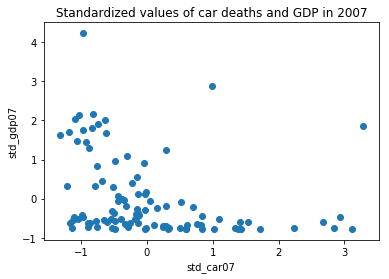

In [40]:
# This code produces a scatter plot.
plt.scatter(df_car_gdp4['std_car07'], df_car_gdp4['std_gdp07'])
plt.title('Standardized values of car deaths and GDP in 2007')
plt.xlabel('std_car07')
plt.ylabel('std_gdp07')

In the end, a regression line is drawn. This line illustrates the correlation between both variables.
But how to draw a regression line? The respective function is y = a + b*x.<br>
We can calculate b with: b = r * y.std/x.std<br>
These are the values of the variables:<br>
r = Pearson's r or correlation, in this case roughly -0.3 (correlation(df_car_gdp2['car07'], df_car_gdp2['gdp07']))<br>
x.std = standard deviation of std_car07 (df_car_gdp4['std_car07'].std(ddof=0))<br>
y.std = standard deviation of std_gdp07 (df_car_gdp4['std_gdp07'].std(ddof=0))<br><br>
Now we can get the value for b with the function <b>calc_b</b>

In [41]:
# This function calculates the value of the
# variable b.
def calc_b(x, y, z):
    b = x * y/z
    return b

b = calc_b(correlation(df_car_gdp2['car07'], df_car_gdp2['gdp07']), df_car_gdp4['std_gdp07'].std(ddof=0), df_car_gdp4['std_car07'].std(ddof=0))
b

-0.3001997585330501

Now I have to calculate the value for a of the regression line:<br>
a = std_gdp07.mean() - b * std_car07.mean()<br>
Therefor I use the function <b>calc_a</b>

In [42]:
# This function calculates the value of the
# variable a.
def calc_a(x, y, z):
    a = x - y * z
    return a

a = calc_a(df_car_gdp4['std_gdp07'].mean(), b, df_car_gdp4['std_car07'].mean())
a

2.3052601305044526e-17

The values for the variables a and b can now be taken for the function f(x), in order to draw the regression line. The downward trend of the line also implies a negative correlation, what I have calculated before.

In [43]:
# The code produces a scatter plot with a regression line.
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


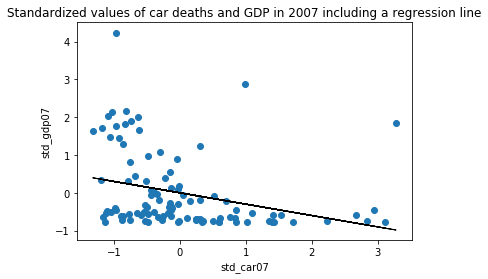

In [44]:
plt.scatter(df_car_gdp4['std_car07'], df_car_gdp4['std_gdp07'])
plt.title('Standardized values of car deaths and GDP in 2007 including a regression line')
plt.xlabel('std_car07')
plt.ylabel('std_gdp07')
f = lambda x: b*x + a
x = np.array(df_car_gdp4['std_car07'])
plt.plot(x,f(x),lw=1, c='k')
plt.show()

## Conclusion
### This part contains the main results of the analysis and information about respective limitations
I raised three questions in this analyis. <b>Question 1</b> focussed on countries what have the smallest/ biggest number of car deaths per year in the time frame 1999 to 2008. In the analysis it was possible to get respective answers. Those countries with the highest number of car deaths are mainly located in Central America and the Carribean. The countries with the smallest number of car deaths can be found in (South East) Asia and the Indian Ocean. A challenge was the lack of available data for many countries.


<b>Countries with the highest number of car deaths.Percentage of complete data is not considered.</b>

In [45]:
# The following line gets the maximum values
# of the data frame df2 for each year between 1999 and 2008.
df2.loc[df2.iloc[:, 0:10].idxmax()]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,number-NaN
country,,,,,,,,,,,
El Salvador,33.7,NaN,32.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Dominican Republic,20.3,17.1,17.2,NaN,17.3,15.5,NaN,NaN,17.1,NaN,4
El Salvador,33.7,NaN,32.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Latvia,13.6,13.0,12.4,12.8,11.7,11.1,10.2,8.13,10.0,8.28,0
Dominican Republic,20.3,17.1,17.2,NaN,17.3,15.5,NaN,NaN,17.1,NaN,4
Iran,NaN,NaN,NaN,NaN,NaN,26.7,NaN,NaN,NaN,NaN,9
Maldives,NaN,NaN,NaN,NaN,NaN,NaN,29.3,NaN,NaN,NaN,9
Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.90,NaN,NaN,9
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.9,NaN,9


<b>Countries with the highest number of car deaths. Percentage of complete data is considered (at least 60% of the data should be complete).</b>

In [46]:
# The following line gets the maximum values
# of the data frame df3 for each year between 1999 and 2008.
df3.loc[df3.iloc[:, 0:10].idxmax()]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,number-NaN
country,,,,,,,,,,,
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4
Latvia,13.6,13.00,12.4,12.80,11.70,11.10,10.20,8.13,10.00,8.28,0
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4
Bahamas,14.5,14.80,10.5,8.14,8.18,11.50,14.20,NaN,9.41,NaN,2
Lithuania,11.5,9.42,10.7,11.20,11.70,11.00,12.70,13.70,13.20,8.09,0
Dominican Republic,20.3,17.10,17.2,NaN,17.30,15.50,NaN,NaN,17.10,NaN,4


<b>Countries with the smallest number of car deaths.Percentage of complete data is not considered.</b>

In [47]:
# The following line gets the minimum values
# of the data frame df2 for each year between 1999 and 2008.
df2.loc[df2.iloc[:, 0:10].idxmin()]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,number-NaN
country,,,,,,,,,,,
Chile,0.771,1.420,1.770,0.880,1.220,1.47,1.33,3.330,NaN,NaN,2
Mauritius,NaN,0.113,0.119,NaN,NaN,NaN,NaN,NaN,2.990,NaN,7
Mauritius,NaN,0.113,0.119,NaN,NaN,NaN,NaN,NaN,2.990,NaN,7
Malaysia,NaN,5.880,0.644,0.383,1.720,9.86,10.60,9.540,6.130,NaN,2
Singapore,0.808,0.918,0.923,0.805,0.914,NaN,NaN,NaN,0.715,NaN,4
St. Vincent and the Grenadines,NaN,2.190,0.946,1.630,NaN,1.44,NaN,NaN,3.120,NaN,5
Costa Rica,5.970,5.370,1.980,4.750,4.690,3.48,1.15,0.589,6.320,NaN,1
Costa Rica,5.970,5.370,1.980,4.750,4.690,3.48,1.15,0.589,6.320,NaN,1
Singapore,0.808,0.918,0.923,0.805,0.914,NaN,NaN,NaN,0.715,NaN,4


<b>Countries with the smallest number of car deaths. Percentage of complete data is considered (at least 60% of the data should be complete).</b>

In [48]:
# The following line gets the minimum values
# of the data frame df3 for each year between 1999 and 2008.
df3.loc[df3.iloc[:, 0:10].idxmin()]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,number-NaN
country,,,,,,,,,,,
Chile,0.771,1.420,1.770,0.880,1.220,1.47,1.33,3.330,NaN,NaN,2
Singapore,0.808,0.918,0.923,0.805,0.914,NaN,NaN,NaN,0.715,NaN,4
Malaysia,NaN,5.880,0.644,0.383,1.720,9.86,10.60,9.540,6.130,NaN,2
Malaysia,NaN,5.880,0.644,0.383,1.720,9.86,10.60,9.540,6.130,NaN,2
Singapore,0.808,0.918,0.923,0.805,0.914,NaN,NaN,NaN,0.715,NaN,4
Malta,1.390,2.510,2.300,1.430,0.956,1.45,2.69,1.460,1.520,2.23,0
Costa Rica,5.970,5.370,1.980,4.750,4.690,3.48,1.15,0.589,6.320,NaN,1
Costa Rica,5.970,5.370,1.980,4.750,4.690,3.48,1.15,0.589,6.320,NaN,1
Singapore,0.808,0.918,0.923,0.805,0.914,NaN,NaN,NaN,0.715,NaN,4


<b>Question 2</b> asked for the the average number of car deaths per 100,000 people developing between 1999 and 2008. The results show a downward trend with the maximum value in 1999 of 2.7 and the minimum value in 2006 of 5.5. It could be useful to look for additional data from other sources, in order obtain a more complete data set and get a more accurate result.  

The focus of <b>Question 3</b> was the correlation between number of car deaths and the GDP in the year 2007. Pearson's r is about -0.3, that means there is a negative correlation between both variables, although it is not very high. We could assume that if the gdp decreases, the number of car deaths increases and vice versa. But we have to be careful, because correlation does not necessarily imply causation. The analysis would be more complete, if it also includes a research on the average yearly GDP of countries in the time frame 1999 to 2008.  

The reference for this data analysis project is given in the introduction part. I used the website https://stackoverflow.com/ for further information and advice.